In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import dabl
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15, 8)

import seaborn as sns

sns.set()

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [3]:
df = pd.read_csv("Mall_Customers.csv")

<IPython.core.display.Javascript object>

In [4]:
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

<IPython.core.display.Javascript object>

In [5]:
df.shape

(200, 5)

<IPython.core.display.Javascript object>

In [6]:
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

<IPython.core.display.Javascript object>

In [7]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

<IPython.core.display.Javascript object>

In [8]:
df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

<IPython.core.display.Javascript object>

In [9]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:>

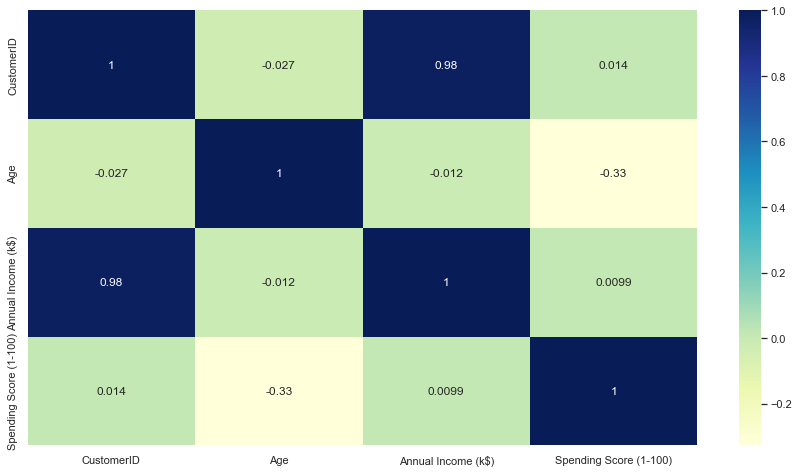

<IPython.core.display.Javascript object>

In [10]:
# check the correlation map
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

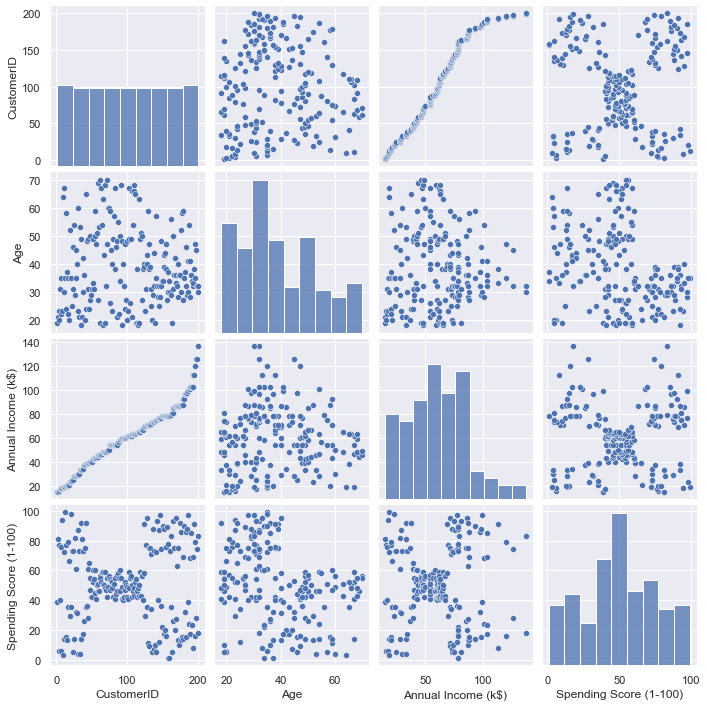

<IPython.core.display.Javascript object>

In [11]:
# check the pairplot
sns.pairplot(df)

<AxesSubplot:title={'center':'Density plot of Age'}, xlabel='Age', ylabel='Density'>

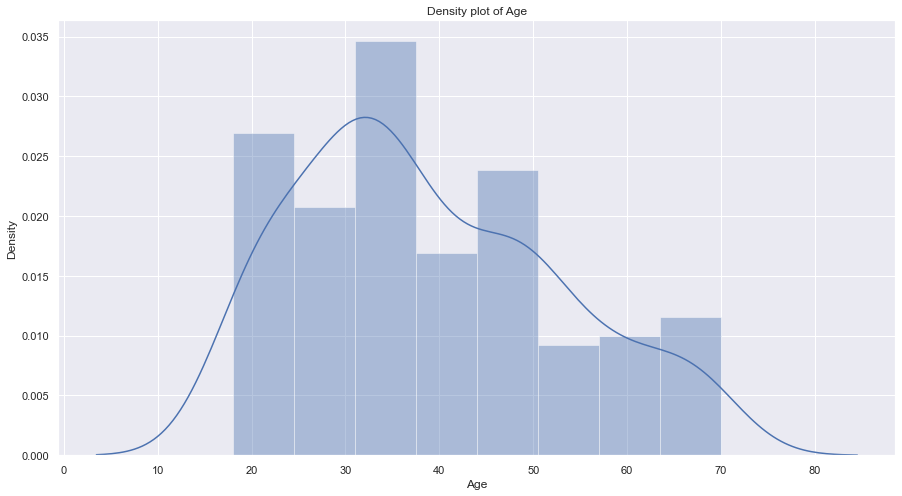

<IPython.core.display.Javascript object>

In [12]:
# distribution of age
plt.title("Density plot of Age")
sns.distplot(df["Age"])

<AxesSubplot:title={'center':'Density plot of Annual Income'}, xlabel='Annual Income (k$)', ylabel='Density'>

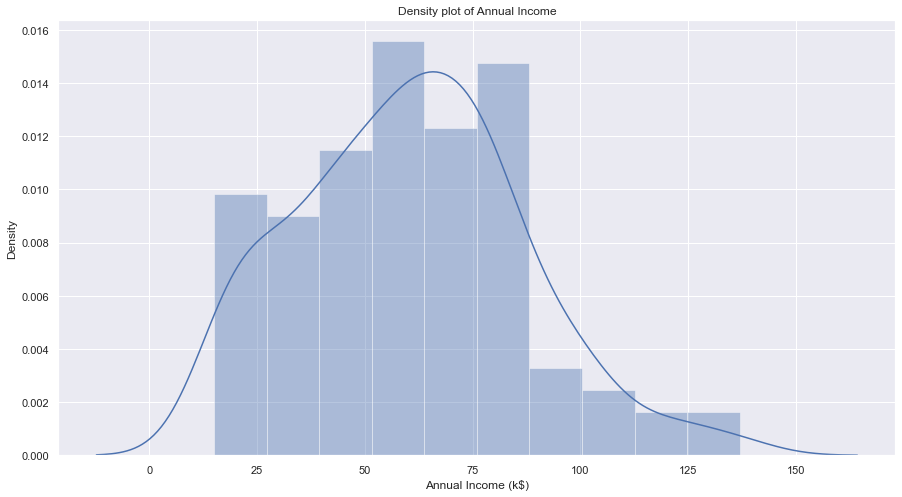

<IPython.core.display.Javascript object>

In [13]:
plt.title("Density plot of Annual Income")
sns.distplot(df["Annual Income (k$)"])

<AxesSubplot:title={'center':'Histogram of Spending Score'}, xlabel='Spending Score (1-100)', ylabel='Count'>

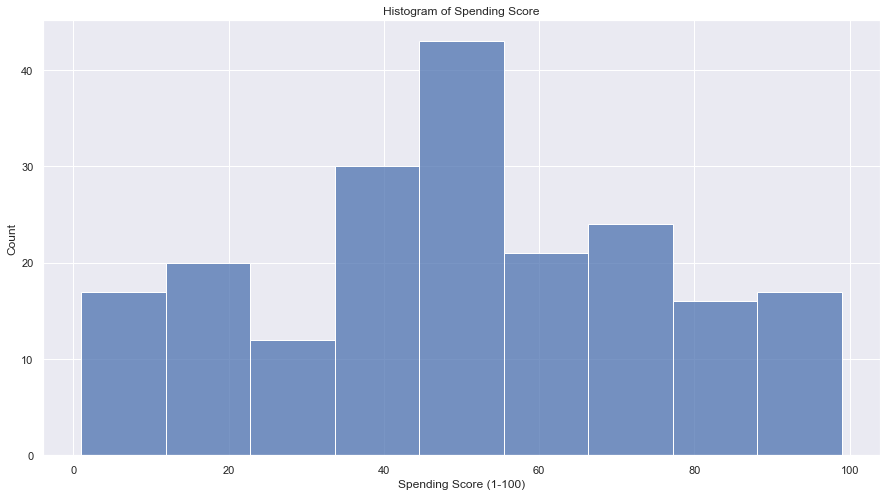

<IPython.core.display.Javascript object>

In [14]:
plt.title("Histogram of Spending Score")
sns.histplot(df["Spending Score (1-100)"])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

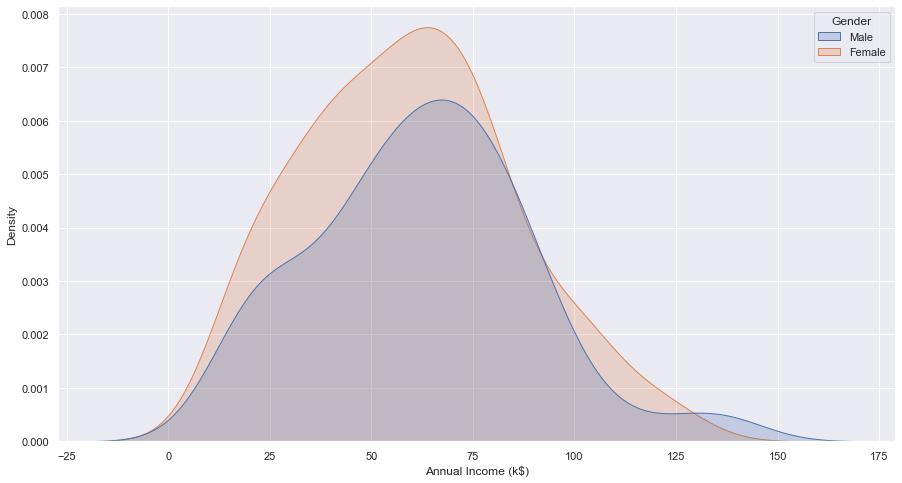

<IPython.core.display.Javascript object>

In [15]:
sns.kdeplot(df["Annual Income (k$)"], shade=True, hue=df["Gender"])

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

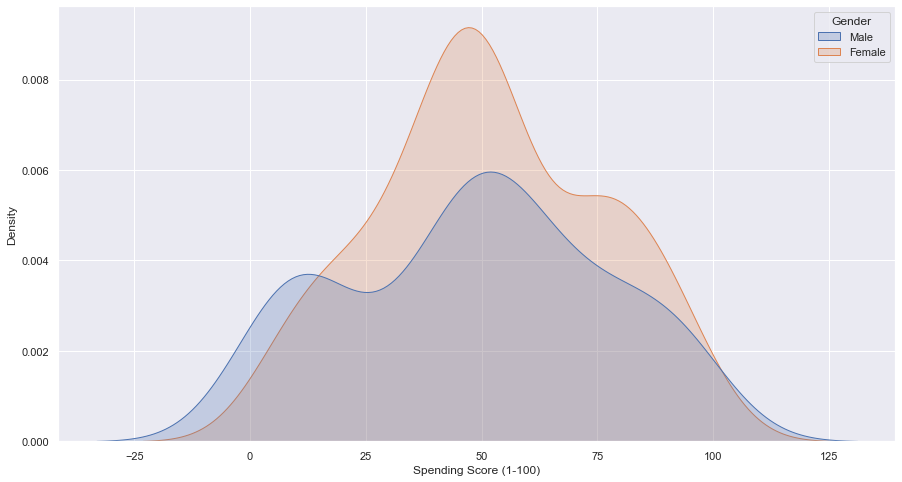

<IPython.core.display.Javascript object>

In [16]:
sns.kdeplot(df["Spending Score (1-100)"], shade=True, hue=df["Gender"])

Target looks like regression


[array([[<AxesSubplot:title={'center':'F=3.04E-02'}, xlabel='Age', ylabel='Annual Income (k$)'>,
         <AxesSubplot:title={'center':'F=1.94E-02'}, xlabel='Spending Score (1...'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=0.00E+00'}, xlabel='Annual Income (k$)', ylabel='Gender'>]],
       dtype=object)]

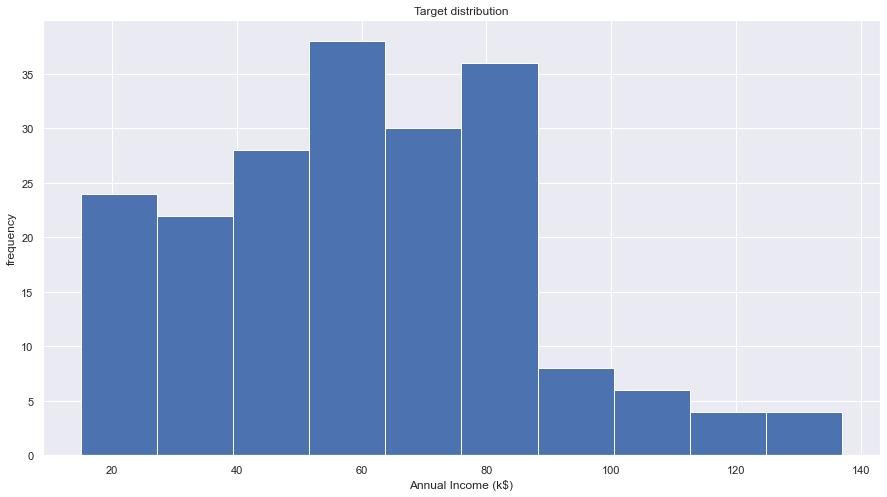

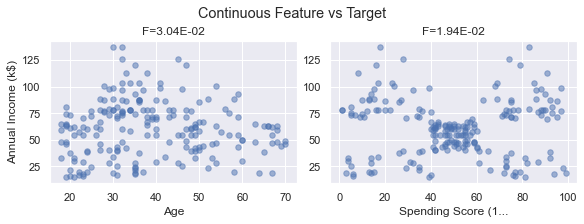

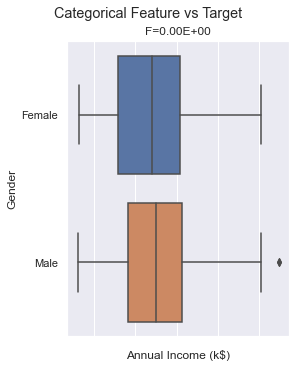

<IPython.core.display.Javascript object>

In [17]:
dabl.plot(df, target_col="Annual Income (k$)")

Target looks like regression


[array([[<AxesSubplot:title={'center':'F=2.37E+01'}, xlabel='Age', ylabel='Spending Score (1...'>,
         <AxesSubplot:title={'center':'F=1.94E-02'}, xlabel='Annual Income (k$)'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=5.78E-02'}, xlabel='Spending Score (1...', ylabel='Gender'>]],
       dtype=object)]

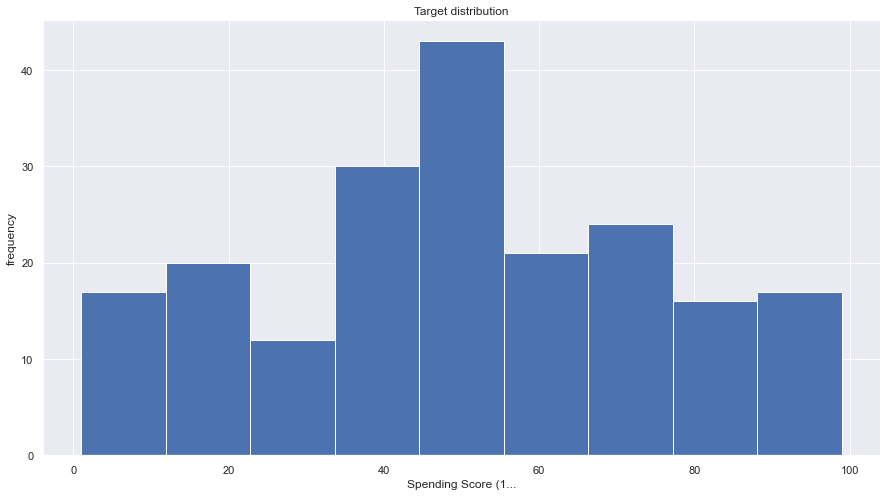

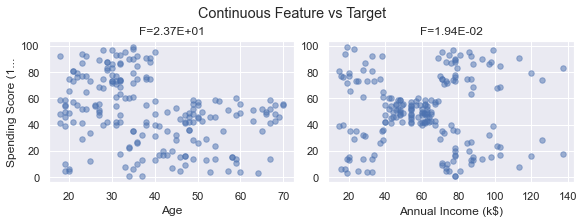

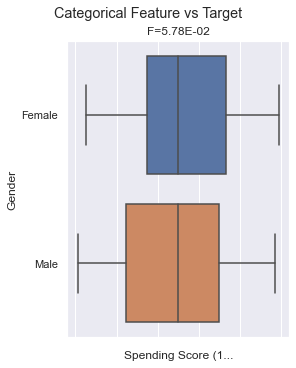

<IPython.core.display.Javascript object>

In [18]:
dabl.plot(df, target_col="Spending Score (1-100)")

Target looks like regression


[array([[<AxesSubplot:title={'center':'F=2.37E+01'}, xlabel='Spending Score (1...', ylabel='Age'>,
         <AxesSubplot:title={'center':'F=3.04E-02'}, xlabel='Annual Income (k$)'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=7.55E-02'}, xlabel='Age', ylabel='Gender'>]],
       dtype=object)]

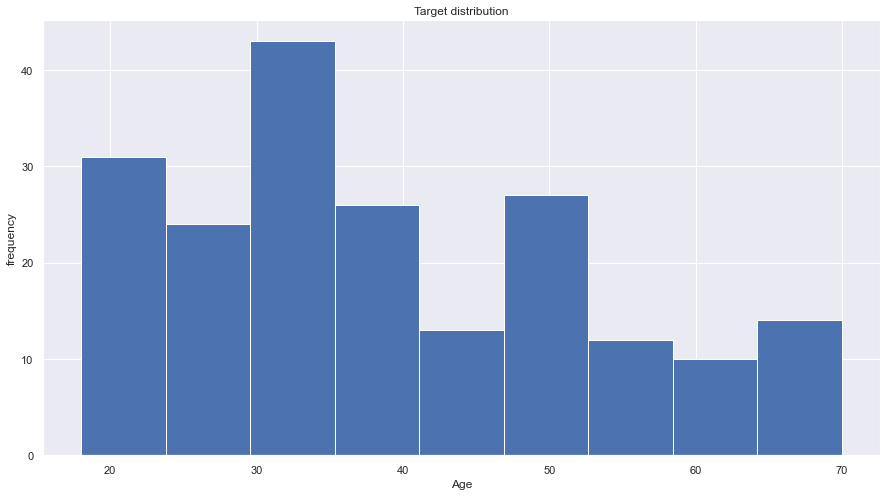

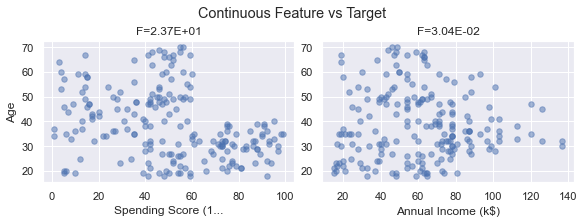

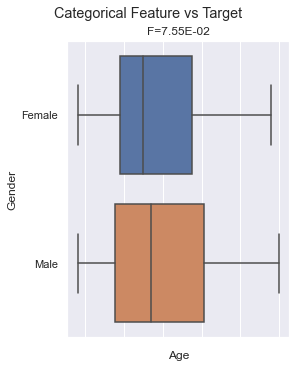

<IPython.core.display.Javascript object>

In [19]:
dabl.plot(df, target_col="Age")

<AxesSubplot:title={'center':'Distribution of Age'}, xlabel='Age', ylabel='count'>

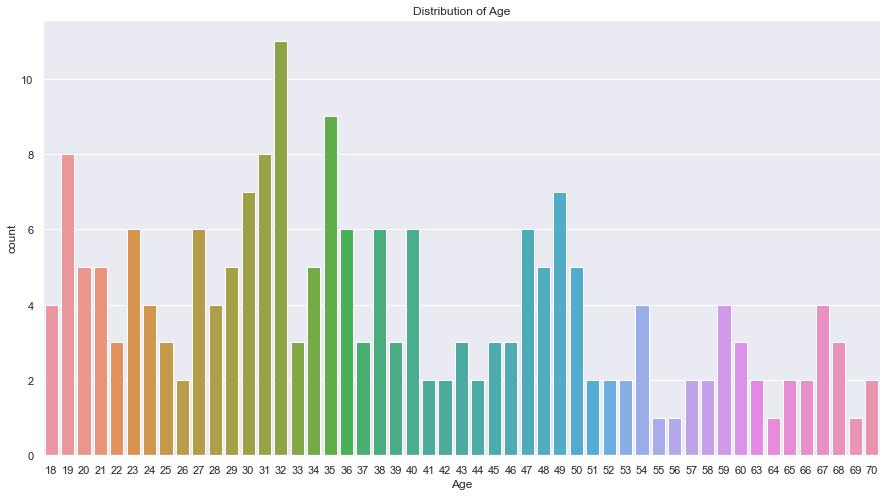

<IPython.core.display.Javascript object>

In [20]:
plt.title("Distribution of Age")
sns.countplot(df["Age"])

# Cluster Analysis

### 1. Clustering using age and spending score

In [21]:
X = df[["Age", "Spending Score (1-100)"]].iloc[:, :].values

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Inertia')

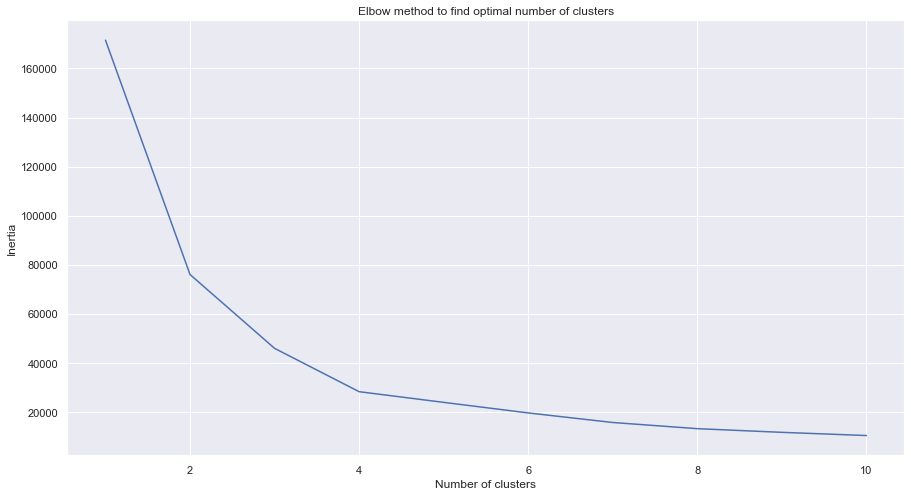

<IPython.core.display.Javascript object>

In [22]:
# reference: https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
inertia = []
for n in range(1, 11):
    km = KMeans(n_clusters=n, init="k-means++", n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia)
plt.title("Elbow method to find optimal number of clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

optimal number of clusters = 4

Text(0, 0.5, 'Spending score')

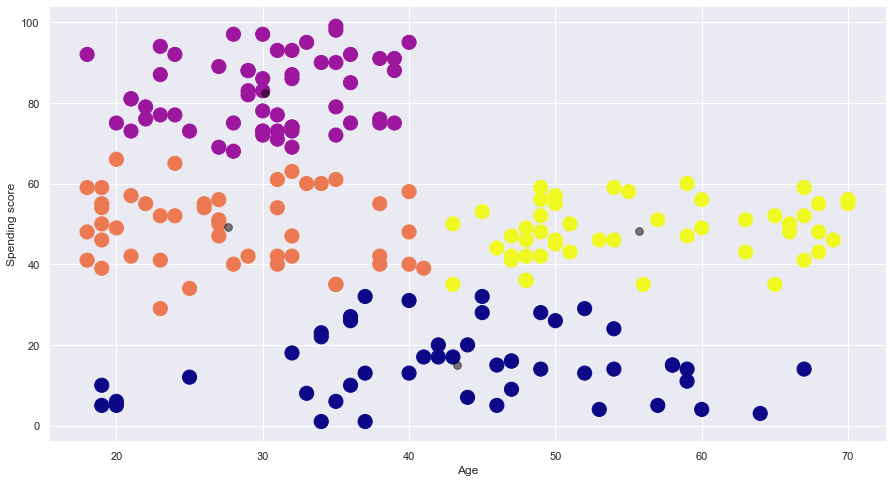

<IPython.core.display.Javascript object>

In [23]:
kmeans = KMeans(n_clusters=4, init="k-means++", n_init=10, max_iter=300, random_state=0)
kmeans.fit(X)
y_means = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_means, s=200, cmap="plasma")

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="black", s=60, alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Spending score")

In [24]:
# silhouette score
score = silhouette_score(X, kmeans.labels_, metric="euclidean")
print("Silhouette score: %.3f" % score)

Silhouette score: 0.500


<IPython.core.display.Javascript object>

## 2. Clustering using annual income and spending score

Text(0, 0.5, 'Inertia')

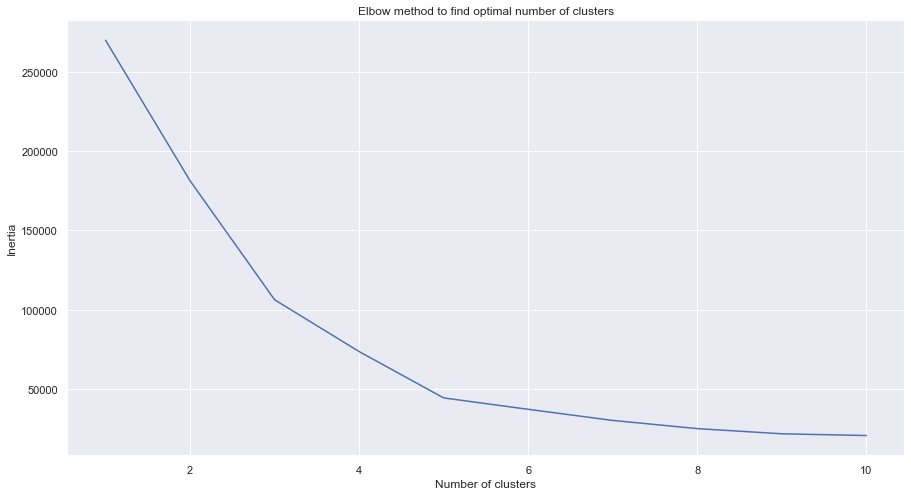

<IPython.core.display.Javascript object>

In [25]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]].iloc[:, :].values
inertia = []
for n in range(1, 11):
    km = KMeans(n_clusters=n, init="k-means++", n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia)
plt.title("Elbow method to find optimal number of clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

optimal number of clusters = 5

Text(0, 0.5, 'Spending Score')

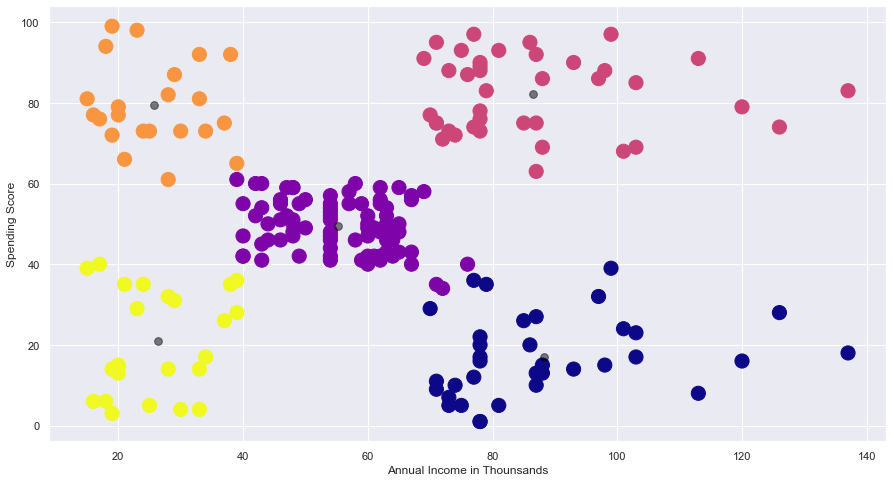

<IPython.core.display.Javascript object>

In [26]:
kmeans = KMeans(n_clusters=5, init="k-means++", n_init=10, max_iter=300, random_state=0)
kmeans.fit(X)
y_means = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_means, s=200, cmap="plasma")

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="black", s=60, alpha=0.5)
plt.xlabel("Annual Income in Thounsands")
plt.ylabel("Spending Score")

In [27]:
# silhouette score
score = silhouette_score(X, kmeans.labels_, metric="euclidean")
print("Silhouette score: %.3f" % score)

Silhouette score: 0.554


<IPython.core.display.Javascript object>

## 3. Clustering using age, spening score and annual income

Text(0, 0.5, 'Inertia')

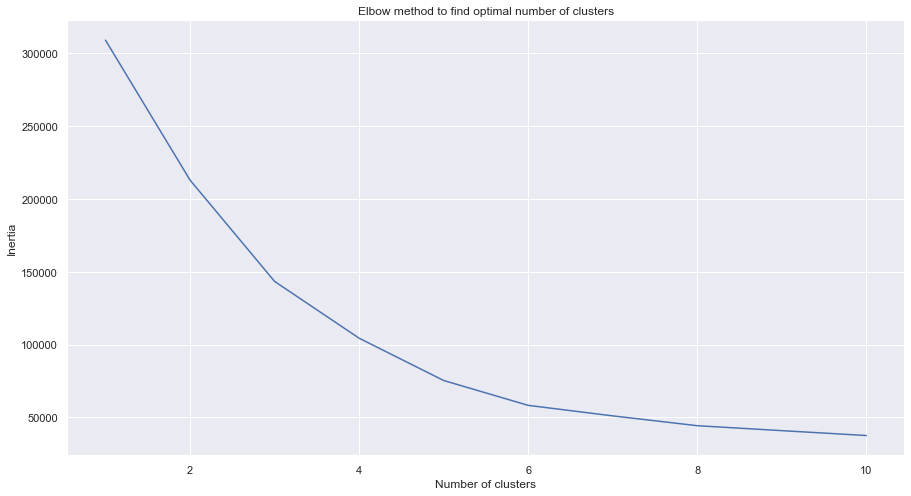

<IPython.core.display.Javascript object>

In [28]:
X = df[["Annual Income (k$)", "Spending Score (1-100)", "Age"]].iloc[:, :].values
inertia = []
for n in range(1, 11):
    km = KMeans(n_clusters=n, init="k-means++", n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia)
plt.title("Elbow method to find optimal number of clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

optimal number of clusters = 6

In [31]:
# reference: https://plotly.com/python/v3/3d-point-clustering/
import plotly.graph_objs as go
import plotly as py

kmeans = KMeans(n_clusters=6, init="k-means++", n_init=10, max_iter=300, random_state=0)
kmeans.fit(X)
# generate the cluster labels
labels = kmeans.labels_

df["labels"] = labels
scatter = go.Scatter3d(
    mode="markers",
    x=df["Age"],
    y=df["Spending Score (1-100)"],
    z=df["Annual Income (k$)"],
    marker=dict(
        color=df["labels"],
        size=10,
        line=dict(color=df["labels"], width=10),
        opacity=0.8,
    ),
)
data = [scatter]
layout = go.Layout(
    title="3D Clusters",
    scene=dict(
        xaxis=dict(title="Age"),
        yaxis=dict(title="Spending Score"),
        zaxis=dict(title="Annual Income"),
    ),
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

<IPython.core.display.Javascript object>

In [32]:
# silhouette score
score = silhouette_score(X, kmeans.labels_, metric="euclidean")
print("Silhouette score: %.3f" % score)

Silhouette score: 0.452


<IPython.core.display.Javascript object>